1. マイナビ　詳解　ディープラーニング　巣籠悠輔
1. オライリージャパン　ゼロから作るDeep Learning　斎藤康毅
1. 講談社　深層学習　岡谷貴之

以上の書籍から重要箇所を抜き出してまとめたもの

### モデルの学習の基本の流れ
1. モデルの出力を式で表す
1. 誤差関数を定義する
1. 誤差関数を最小化すべく、各パラメータに対する勾配を求める
1. 確率的勾配降下法により最適なパラメータを探索する

### 単純パーセプトロン
入力が$n$個の場合に拡張して一般化してみる。
出力を表す式は、

$$
y = 
\begin{cases}
    1 & (w_1x_1 + w_2x_2 + \cdots + w_nx_n \geq \theta) \\
    0 & (w_1x_1 + w_2x_2 + \cdots + w_nx_n < \theta))
\end{cases}
$$

となる。ここで下式で表される関数$f(x)$を考えると、

$$
f(x) =
\begin{cases}
    1 (x \geq 0) \\
    0 (x < 0)
\end{cases}
$$

ネットワークの出力$y$は

$$
y = f(w_1x_1 + w_2x_2 + \cdots + w_nx_n - \theta)
$$

と書きなおすことができる。この$f(x)$のことを **ステップ関数(step function)** と呼ぶ

$$
{\bf x} = 
\begin{pmatrix}
    x_1 \\
    x_2 \\
    \vdots \\
    x_n
\end{pmatrix}
, {\bf w} =
\begin{pmatrix}
    w_1 \\
    w_2 \\
    \vdots \\
    w_n
\end{pmatrix}
$$

とすると、最終的に出力は

$$
y = f({\bf w} \top {\bf x} + b)
$$

と書くことができる。


1. ニューラルネットワークは入力層、隠れ層、出力層を持つ
1. 全結合層によって線形な変換が行われ、活性化関数によって非線形名変換が行われる。
    1. 線形な変換
    
    Affine変換$\cdots$全層結合
    
    1. 非線形な変換
    
    活性化関数$\cdots$非線形な効果を与える。<br>
    非線形な活性化関数を用いることで、
    ニューラルネットワークの表現力を増す。
    パーセプトロンでは活性化関数にステップ関数を
    用いている。実は、パーセプトロンとニューラル
    ネットワークの違いは、活性化関数に何を用いて
    いるかのみの違いとなる。
        1. パーセプトロン：ステップ関数
        1. ニューラルネットワーク：シグモイド関数
        シグモイド関数はその一つで以下の様に表す。
$$
\sigma(x) = \frac{1}{1+exp(-x)}
$$

ステップ関数の代わりにシグモイド関数を用いたモデルの事を、ロジスティック回帰という。回帰と言いながら、実際にやっていることは分類になることに注意。 

1. 損失関数

学習の進捗程度を表す指標。これを”loss”と呼ぶ。単一の
スカラとして表現される。
損失関数(loss function)

#### シグモイド関数
Cはニューロンが発火する場合を$C=1$、発火しない場合を$C=0$となる確率変数。

$$
p(C = 1 | {\bf x}) = \sigma({\bf w} \top {\bf x} + b) = y
$$

確率は和が1となるので、ニューロンが発火しない確率は

$$
p(C=0 | {\bf x}) = 1 - p(C = 1|{\bf x}) = 1 - y
$$

となる。両式をまとめると

$$
p(C = t | {\bf x}) = y^t(1-y)^{1-t}
$$

とかける。ただし、$t {0, 1}$である。

#### シグモイド関数が使われる理由
$$
f(x) = 1 + \exp^{-x}
$$
とすると、
$$
y = \frac{1}{f(x)} \\
\therefore \frac{dy}{dx} = - \frac{f'(x)}{f(x)^2} = - \frac{\frac{d}{dx} (1+e^{-x})}{(1+e^{-x})^2} = \frac{1}{1+e^{-x}} \cdot \frac{e^{-x}}{1+e^{-x}} = \sigma(x)(1 - \sigma(x))
$$

となり、シグモイド関数を微分した結果はシグモイド関数自身で表されることがわかる。この特徴が理論上も実装上も大いに役に立つ。

In [34]:
# 活性化関数
x = np.linspace(-5, 5, 100)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    # 正規化線形関数
    # rectified linear function
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

plt.plot(x, sigmoid(x), x, relu(x), x, tanh(x))
plt.legend(['sigmoid', 'relu', 'tanh'])
plt.ylim(-1.5, 1.5)
plt.grid()

## 出力層の設計と誤差関数

|問題の種別|出力層の活性化関数|誤差関数|
|----------|------------------|---------|
|回帰|恒等写像|二乗誤差|
|二値分類|ロジスティック関数|最尤推定法から求めた式|
|多クラス分類|ソフトマックス関数|交差エントロピー|

### 回帰
#### 恒等写像
$$
f(u) = u
$$
#### 二乗誤差
$$
{\bf\|d - y(x;w)\|}^2
$$
これを訓練データの全サンプル $n = 1, \cdots , N$について加算したものを$1/2$にした
$$
E({\bf w}) = \frac{1}{2}\sum_{n=1}^{N}\|{\bf d_n - y(x_n; w)\|}^2
$$
を考え、これが最も小さくなるような$w$を選ぶ。$1/2$にするのhあ、微分すると2乗の2と相殺されるから。この$E(w)$が回帰で最も一般的な誤差関数になる。

### 二値分類
#### ロジスティック関数
logistic function, もしくは、ロジスティックシグモイド関数(logistic sigmoid function)ともいい、以下の式で定義される。

$$
f(u) = \frac{1}{1 + e^{-u}}
$$

#### 最尤推定法による誤差関数の導出
事後分布を$d=1, d = 0$の事後分布を使って
$$
p(d|x) = p(d=1|{\bf x})^{d}p(d=0|{\bf x})^{1-d}
$$

このモデルのもとで${\bf w}$のデータに対する *尤度 (likelihood)* を求め、
それを最大化するような${\bf w}$を選ぶ。

$$
L({\bf w}) \equiv \prod_{n=1}^{N}p(d_{n}|{\bf x_{n}; w}) = \prod_{n=1}^{N}\{y({\bf x_{n};w})\}^{d_{n}}\{1 - y({\bf x_{n};w)}\}^{1-d_{n}}
$$

対数関数は単調増加→この式の対数をとっても結果は同じも→
上式で表される尤度の対数を取り、更に最大化の代わりに最小化を
考えることにして符号を反転させると
$$
E({\bf w}) = -\sum_{n=1}^{N}[d_{n}\log{y({\bf x_{n}; w})} + (1-d_{n})\log{\{1-y({\bf x_{n}; w})\}}]
$$
これを誤差関数とする
- [Qiita 尤度って何？](https://qiita.com/kenmatsu4/items/b28d1b3b3d291d0cc698)

事後確率$p(d = 1|{\bf x})$は条件付き確率の定義から

$$
p(d = 1| {\bf x}) = \frac{p({\bf x}, d =1)}{p({\bf x}, d=0) + p({\bf x}, d = 1)}
$$

とかける。ここで

$$
u \equiv \log{\frac{p({\bf x}, d=1)}{p({\bf x}, d = 0)}}
$$

と置くと、事後確率$p(d=1|{\bf x})$は$u$のロジスティック関数に一致する



### 多クラス分類 


#### ソフトマックス関数
- 単純パーセプトロン・ロジスティック回帰→ニューロンが発火する・発火しないの２パターンを分類するもの
- 多クラス分類・多クラスロジスティック回帰→２つ以上のクラスに分類するもの

活性化関数をステップ関数からシグモイド関数に帰ることで、出力値を確立にすることが可能になったのと同様に、
シグモイド関数の形を少し帰ることで、多クラス分類が可能になる。この関数を **ソフトマックス関数** という。

$n$次元のベクトル$x=(x_1 \space x_2 \cdots x_n)^{T}$に対して 
$$
\begin{align}
softmax(x)_{i} = \frac{e^{x_{i}}}{\sum_{j=1}^{n} e^{x_{j}}} && (i = 1,2,\ldots,n)
\end{align}
$$

#### 1. 多クラス分類のモデルの出力式
$$
\begin{align}
{\bf y} = f(W{\bf x} + {\bf b})
\end{align}
$$
ここで$f(\cdot)$をソフトマックス関数とすることで、多クラス分類に対応したモデルとして使えるようになる

#### 2. 誤差関数を定義する
多クラスに対する尤度関数として以下が得られる。これを最大化するようなパラメータを求めれば良い。
$$
\begin{align}
L(W, {\bf b}) =& \prod_{n=1}^{N}\prod_{k=1}^{K}p(C=k|{\bf x}_{n})^{t_{nk}} \\
=& \prod_{n=1}^{N}\prod_{k=1}^{K}y_{nk}^{t_{nk}} \\
\end{align}
$$
これを最大化するようなパラメータを求めれば良い。対数をとって符号を反転させた関数を考えれば、
多クラス版の交差エントロピー誤差関数が最小化すべき関数として求まる。
$$
\begin{align}
E(W, {\bf b}) :=& -\log L(W, {\bf b}) \\
=& -\sum_{n=1}^{N}\sum_{k=1}^{K}t_{nk}\log y_{nk}
\end{align}
$$

#### 3. 誤差関数を最小化すべく、各パラメータに対する勾配を求める 
$$
\begin{align}
\frac{\partial E}{\partial b_{j}} =& - \sum_{n=1}^{N}({\bf t}_{n} - {\bf y}_{n}) \\
\frac{\partial E}{\partial {\bf b}} =& - \sum_{n=1}^{N}({\bf t}_{n} - {\bf y}_{n})
\end{align}
$$

#### 4. 確率的勾配降下法により最適なパラメータを探索する 

In [16]:
# TensorFlowによる実装
from sklearn.utils import shuffle
import tensorflow as tf
M = 2 # 入力データの次元
K = 3 # クラス数
n = 100 # クラス毎のデータ数
N = n * K # 全データ数

In [2]:
# 入力データ
X1 = np.random.randn(n, M) + np.array([0, 10])
X2 = np.random.randn(n, M) + np.array([5, 5])
X3 = np.random.randn(n, M) + np.array([10, 0])

# 正解ラベル
Y1 = np.array([[1, 0, 0] for i in range(n)])
Y2 = np.array([[0, 1, 0] for i in range(n)])
Y3 = np.array([[0, 0, 1] for i in range(n)])

# 全データ, 全正解ラベル
X = np.concatenate((X1, X2, X3), axis=0)
Y = np.concatenate((Y1, Y2, Y3), axis=0)


In [13]:
plt.plot(X[:,0], X[:,1], marker='o', ls='')

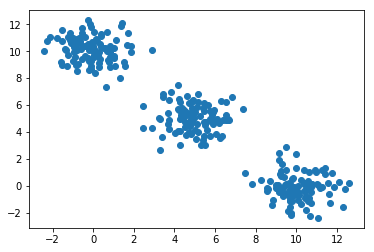

In [14]:
plt.show()

In [19]:
# モデルの定義
W = tf.Variable(tf.zeros([M, K])) # M x K array
b = tf.Variable(tf.zeros([K]))

x = tf.placeholder(tf.float32, shape=[None, M]) # M: 入力データの次元
t = tf.placeholder(tf.float32, shape=[None, K]) # K: クラス数
y = tf.nn.softmax(tf.matmul(x, W) + b)

In [20]:
# 誤差関数の定義
cross_entropy = tf.reduce_mean(-tf.reduce_sum(t * tf.log(y), reduction_indices=[1]))

In [21]:
# 勾配
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)

In [22]:
# 評価
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(t, 1))

In [23]:
# ミニバッチ
batch_size = 50 # ミニバッチサイズ
n_batches = N // batch_size

In [24]:
# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [26]:
# 学習
for epoch in range(20):
    X_, Y_ = shuffle(X, Y)
    
    for i in range(n_batches):
        start = i * batch_size
        end = start + batch_size
        
        sess.run(train_step, feed_dict={
            x: X_[start:end],
            t: Y_[start:end]
        })

In [29]:
# 結果の確認
X_, Y_ = shuffle(X, Y)

classified = correct_prediction.eval(session=sess, feed_dict={
    x: X_[0:10],
    t: Y_[0:10]
})
prob = y.eval(session=sess, feed_dict={
    x: X_[0:10]
})

print('classfied:')
print(classified)
print()
print('output probability:')
print(prob)

classfied:
[ True  True  True  True  True  True  True  True  True  True]

output probability:
[[1.8711759e-10 4.7050836e-04 9.9952948e-01]
 [2.4023270e-08 1.7368224e-02 9.8263168e-01]
 [4.1602342e-03 9.8826575e-01 7.5739869e-03]
 [8.6843079e-01 1.3156526e-01 3.9757510e-06]
 [1.4920463e-09 4.2834058e-03 9.9571663e-01]
 [9.9785185e-01 2.1482194e-03 4.7047127e-10]
 [4.6574646e-09 2.2411224e-02 9.7758877e-01]
 [9.9621308e-01 3.7869071e-03 2.4151383e-09]
 [9.9874157e-01 1.2584566e-03 5.1113536e-10]
 [4.4741720e-02 9.4563872e-01 9.6194986e-03]]


In [32]:
ww = sess.run(W)
bb = sess.run(b)

(array([[-1.0929269 ,  0.29785717,  0.7950699 ],
        [ 0.7763626 ,  0.29395822, -1.0703204 ]], dtype=float32),
 array([-0.05158829,  0.09854871, -0.04696041], dtype=float32))

## 多層パーセプトロン

実は単純パーセプトロンやロジスティック回帰は線形分離可能な問題でしかデータを分類できない。ニューロンが発火するかしないかの式は
$$
ax_{1} + bx_{2} + c = 0
$$
の形でまとまるため、1本の直線以上の表現はできない。このため、XORのような分類を学習することはできない。
このような線形分離可能な問題にのみ対応したモデルのことを線形分類器(linear classifier)という。